# Exploratory Data Analysis

### 사용 라이브러리

In [1]:
import pandas as pd
import numpy as np

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from libs import get_file_dir

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 일반폐기물재활용률(10-19)

### 1.0 데이터 불러오기

In [5]:
df = pd.read_csv(get_file_dir('refined','일반폐기물재활용률(10-19).csv'))

,행정구역별(1),행정구역별(2),year,일반폐기물재활용률,총재활용량,생활폐기물총발생량
0,서울특별시,종로구,2010,65.6,288.0,439.0
1,서울특별시,중구,2010,54.5,288.4,529.2
2,서울특별시,용산구,2010,88.8,180.8,203.7


### 2.0 데이터 탐색 및 전처리

In [20]:
df.info() 

# Not-null, 2520 ROW

# 행정구역별(1), (2)          object
# year (연도)             int64
# 일반폐기물재활용률(%)      object -> float
# 총재활용량(톤/일)         object -> float
# 생활폐기물총발생량(톤/일)  object -> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정구역별(1)   2340 non-null   object
 1   행정구역별(2)   2340 non-null   object
 2   year       2340 non-null   int64 
 3   일반폐기물재활용률  2340 non-null   object
 4   총재활용량      2340 non-null   object
 5   생활폐기물총발생량  2340 non-null   object
dtypes: int64(1), object(5)
memory usage: 109.8+ KB


##### 결측치 처리

In [21]:
# 실질적 결측치 처리

df['일반폐기물재활용률'].unique() # '-' 값 존재 (실질적 결측치)

condition = df['일반폐기물재활용률'] == '-'
df[condition] # 동일한 ROW에 56개 존재

# 신설된 시군구로 인한 결측치 발생 추측
# 결측치 정책: 0으로 대치
df.replace('-', '0', inplace=True)

##### 데이터 변환

In [56]:
# 자료형 변환 (object -> float)

df['year'] = df['year'].astype('object')

df['일반폐기물재활용률'] = df['일반폐기물재활용률'].astype('float')

df['총재활용량'] = df['총재활용량'].astype('float')

df['생활폐기물총발생량'] = df['생활폐기물총발생량'].astype('float')

In [44]:
df.describe() 

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,2340.000000,2340.000000,2340.000000
mean,53.035000,131.879444,220.013974
std,18.476864,139.294137,216.906115
min,0.000000,0.000000,0.000000
25%,42.400000,23.900000,53.775000
50%,55.500000,89.250000,165.900000
75%,66.025000,199.675000,315.175000
max,100.000000,1105.800000,1526.900000


In [45]:
df.corr()

# 생활폐기물총발생량과 총재활용량은 강한 상관관계를 가짐.
# 일반폐기물재활용률 = 생활폐기물총발생량 / 총재활용량

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
일반폐기물재활용률,1.000000,0.498241,0.379290
총재활용량,0.498241,1.000000,0.972267
생활폐기물총발생량,0.379290,0.972267,1.000000


### 3.0 시각적 EDA

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

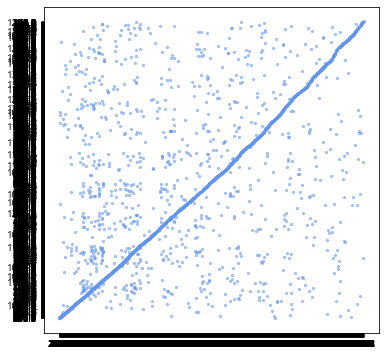

In [4]:
# 데이터 분포

plt.figure(figsize=(6, 6))

sns.regplot(x=df["총재활용량"], y=df["생활폐기물총발생량"], fit_reg=True, scatter_kws={"color":'cornflowerblue',"alpha":0.5,"s":5})

plt.title('총재활용량 & 생활폐기물총발생량 상관관계')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.show()

In [70]:
df_2011 = df[df['year']==2010]
df_2011

,행정구역별(1),행정구역별(2),year,일반폐기물재활용률,총재활용량,생활폐기물총발생량
0,서울특별시,종로구,2010,65.6,288.0,439.0
1,서울특별시,중구,2010,54.5,288.4,529.2
2,서울특별시,용산구,2010,88.8,180.8,203.7
3,서울특별시,성동구,2010,62.8,177.2,282.0
4,서울특별시,광진구,2010,73.6,288.6,392.3
...,...,...,...,...,...,...
229,경상남도,함양군,2010,23.4,6.4,27.3
230,경상남도,거창군,2010,29.1,14.7,50.5
231,경상남도,합천군,2010,45.9,16.2,35.3
232,제주특별자치도,제주시,2010,57.7,272.0,471.4


In [73]:
df_2011.groupby(['행정구역별(1)'])['일반폐기물재활용률'].mean()

행정구역별(1)
강원도        49.333333
경기도        58.703125
경상남도       46.050000
경상북도       43.078261
광주광역시      63.540000
대구광역시      55.750000
대전광역시      64.180000
부산광역시      66.618750
서울특별시      65.252000
울산광역시      67.640000
인천광역시      58.600000
전라남도       42.154545
전라북도       53.928571
제주특별자치도    48.400000
충청남도       46.700000
충청북도       46.384615
Name: 일반폐기물재활용률, dtype: float64

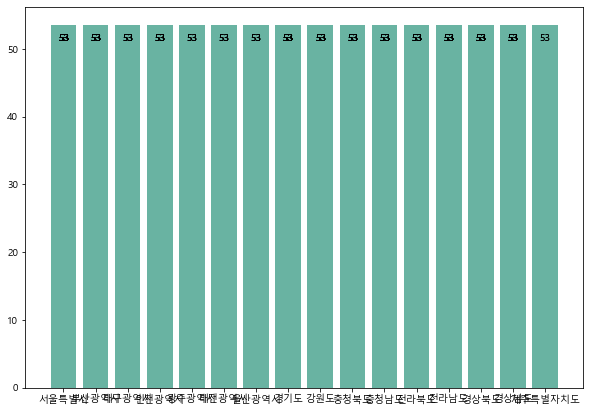

In [68]:
# Set the figure size
plt.figure(figsize=(10, 7))


# plot a bar chart
plot1 = plt.bar(df_2011['행정구역별(1)'], df_2011['일반폐기물재활용률'], color='#69b3a2');

for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             0.95*height,'%d' % int(height), ha='center', va='bottom')

In [ ]:
# 대분류 분포 그래프

digit_1_count = train.groupby(['digit_1'], as_index=False)['AI_id'].count()
digit_1_count.replace(digit_1_dict, inplace=True)

# Set the figure size
plot1 = plt.figure(figsize=(10, 5))

# plot a bar chart
sns.barplot(
    x = 'AI_id', y = 'digit_1',
    data = df,
    estimator=sum, 
    ci=None, 
    order = list(digit_1_count.sort_values('AI_id', ascending=False)['digit_1']),
    color='#69b3a2');

# Hide spines and ticks
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.xlabel("")
plt.ylabel("")

plt.show()